# 02-tumor-growth

_Arvid Lundervold w/Claude 3.5 Sonnet 2025-02-23_



2. **Tumor Growth and Angiogenesis Model**

i. Motivation:
- Understanding cancer progression
- Testing therapeutic strategies
- Modeling blood vessel formation
- Studying drug delivery

AI support: Provide real-world examples, generate case studies, explain clinical relevance.

ii. Conceptual/Mathematical Description:
- Reaction-diffusion equations for tumor cells
- Nutrient and growth factor diffusion
- Blood vessel sprouting rules
- Cell death and proliferation rates

AI support: Visualize mathematical concepts, explain partial differential equations, generate simplified examples.

iii. Implementation:
- Grid-based simulation using NumPy arrays
- Finite difference method for diffusion
- Agent-based model for vessels
- Integration with cellular automata

AI support: Suggest efficient data structures, optimize numerical methods, help with parallel processing.

iv. Simulation/Visualization:
- 2D/3D visualization of tumor growth
- Blood vessel network formation
- Nutrient concentration fields
- Treatment response

AI support: Generate visualization code, suggest animation techniques, create interactive exploration tools.

v. Going Deeper:
- Add immune system response
- Include drug resistance
- Model metastasis
- Incorporate genetic heterogeneity

AI support: Find relevant research papers, suggest model extensions, help with parameter optimization.

----


The project can be implemented with varying levels of complexity, making it suitable for different skill levels. Key Python libraries to use include:

- NumPy/SciPy for numerical computations
- Matplotlib/Plotly for visualization
- NetworkX for network analysis
- Pandas for data management
- SymPy for symbolic mathematics
- scikit-learn for machine learning components

AI can significantly enhance the learning experience by:
1. Generating explanatory content and tutorials
2. Helping with code implementation and debugging
3. Suggesting optimizations and best practices
4. Finding relevant literature and examples
5. Creating interactive visualization tools
6. Assisting with parameter optimization
7. Generating test cases and validation data
8. Helping with model extension and modification


## Tumor Growth Model as a 1D Object Using Coupled Reaction-Diffusion Equations

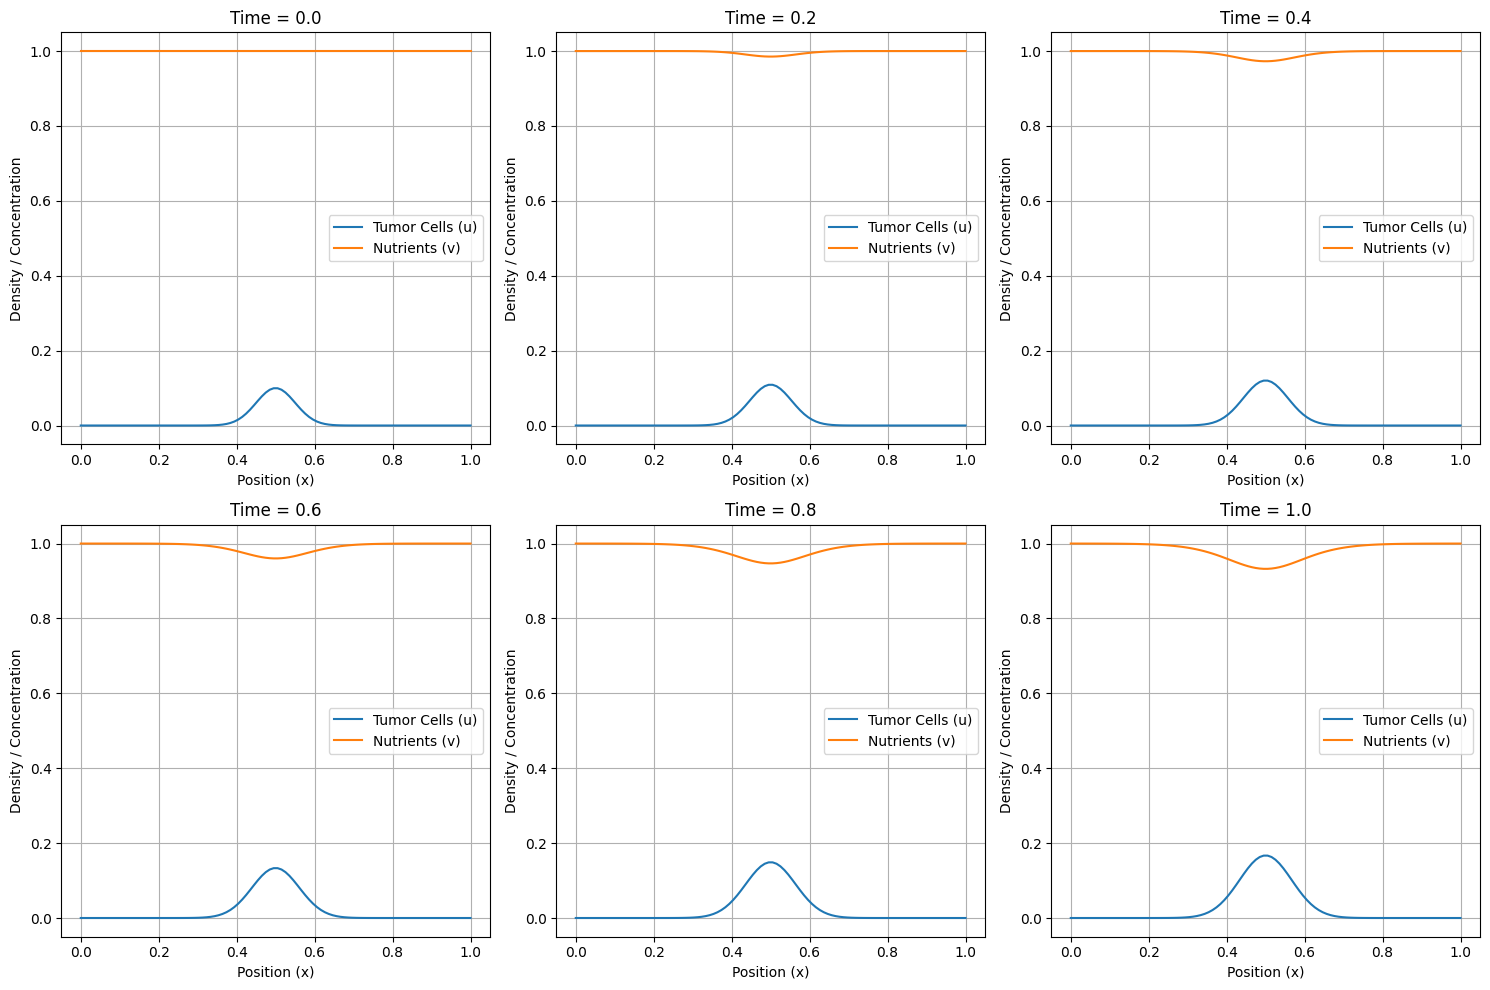

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0           # Length of domain
N = 100           # Number of spatial points
dx = L / (N - 1)  # Spatial step size
x = np.linspace(0, L, N)  # Spatial grid

D_u = 0.001       # Tumor cell diffusion coefficient
D_v = 0.01        # Nutrient diffusion coefficient
rho = 1.0         # Tumor proliferation rate
k = 0.1           # Half-saturation constant for growth
mu = 0.1          # Tumor cell death rate
sigma = 1.0       # Nutrient consumption rate
m = 0.1           # Half-saturation constant for consumption
v_0 = 1.0         # Boundary nutrient concentration

dt = 0.001        # Time step size (satisfies stability: dt < dx^2 / (2 * D_v) ≈ 0.005)
T = 1.0           # Total simulation time
M = int(T / dt)   # Number of time steps

# Initial conditions
u_0 = 0.1         # Initial tumor peak density
sigma_init = 0.05 # Width of initial tumor
u = u_0 * np.exp(-((x - L/2)**2) / (2 * sigma_init**2))  # Gaussian tumor seed
v = v_0 * np.ones(N)  # Uniform nutrient distribution

# Storage for visualization
u_list = [u.copy()]
v_list = [v.copy()]
plot_interval = 200  # Store every 0.2 time units (200 * 0.001 = 0.2)

# Simulation loop
for n in range(M):
    # Diffusion terms
    diff_u = np.zeros(N)
    diff_u[1:-1] = (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2
    diff_u[0] = 2 * (u[1] - u[0]) / dx**2      # No-flux at x=0
    diff_u[-1] = 2 * (u[-2] - u[-1]) / dx**2   # No-flux at x=L
    
    diff_v = np.zeros(N)
    diff_v[1:-1] = (v[2:] - 2 * v[1:-1] + v[:-2]) / dx**2
    
    # Reaction terms
    f = rho * u * v / (v + k) - mu * u
    g = sigma * u * v / (v + m)
    
    # Update
    u_new = u + dt * (D_u * diff_u + f)
    v_new = v.copy()
    v_new[1:-1] = v[1:-1] + dt * (D_v * diff_v[1:-1] - g[1:-1])
    
    u = u_new
    v = v_new
    
    # Store for plotting
    if (n + 1) % plot_interval == 0:
        u_list.append(u.copy())
        v_list.append(v.copy())

# Visualization
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
times = np.arange(0, T + dt * plot_interval, dt * plot_interval)
for i, t in enumerate(times):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.plot(x, u_list[i], label='Tumor Cells (u)')
    ax.plot(x, v_list[i], label='Nutrients (v)')
    ax.set_title(f'Time = {t:.1f}')
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Density / Concentration')
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()


## Tumor Growth Model as a 2D Object Using Coupled Reaction-Diffusion Equations

### Overview

In this model, we represent the tumor as a 2D object, specifically a density field that evolves over time and space in a two-dimensional domain. The dynamics of the tumor growth are governed by coupled reaction-diffusion equations, which account for the spatial spread of tumor cells (diffusion) and their growth or decay due to biological interactions (reaction). This approach simulates how tumor cells interact with their environment, such as nutrients or inhibitors, across a 2D plane. Below, we describe the mathematical formulation, numerical implementation, and provide a Python script to visualize the results.


### Python Implementation

Below is a Python implementation that simulates the tumor as a 2D object using the coupled reaction-diffusion equations. We use NumPy for computations, SciPy for smoothing the initial conditions with a Gaussian filter, and Matplotlib for visualization.

### Mathematical Model of tumor growth

#### Governing Equations
The model consists of two coupled partial differential equations (PDEs) describing the evolution of tumor cell density ($u$) and nutrient concentration ($v$):

$$
\frac{\partial u}{\partial t} = D_u \nabla^2 u + r u \frac{v}{v + k} - \mu u
$$

$$
\frac{\partial v}{\partial t} = D_v \nabla^2 v - \sigma u v
$$

where:
- $u(x,y,t)$: tumor cell density (normalized to [0,1])
- $v(x,y,t)$: nutrient concentration (normalized to [0,1])
- $D_u$: tumor cell diffusion coefficient ($\text{mm}^2/\text{day}$)
- $D_v$: nutrient diffusion coefficient ($\text{mm}^2/\text{day}$)
- $r$: tumor growth rate ($\text{day}^{-1}$)
- $k$: nutrient half-saturation constant (dimensionless)
- $\mu$: tumor death rate ($\text{day}^{-1}$)
- $\sigma$: nutrient consumption rate ($\text{day}^{-1}$)

#### Initial Conditions
- Tumor cells: Gaussian distribution centered at $(L/2, L/2)$:
$$
u(x,y,0) = \exp\left(-\frac{(x-L/2)^2 + (y-L/2)^2}{2\sigma_\text{gauss}^2}\right)
$$
- Nutrients: Uniform initial distribution:
$$
v(x,y,0) = v_0
$$

#### Boundary Conditions
- Tumor cells: No-flux (Neumann) boundary conditions:
$$
\left.\frac{\partial u}{\partial n}\right|_{\partial \Omega} = 0
$$
- Nutrients: Fixed (Dirichlet) boundary conditions:
$$
\left.v\right|_{\partial \Omega} = v_0
$$

#### Numerical Implementation
The PDEs are solved using finite differences:

1. Spatial discretization of the Laplacian ($\nabla^2$):
$$
\nabla^2 u_{i,j} \approx \frac{u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j}}{h^2}
$$

2. Temporal discretization using forward Euler:
$$
u_{i,j}^{n+1} = u_{i,j}^n + \Delta t\left(D_u\nabla^2 u_{i,j}^n + ru_{i,j}^n\frac{v_{i,j}^n}{v_{i,j}^n + k} - \mu u_{i,j}^n\right)
$$
$$
v_{i,j}^{n+1} = v_{i,j}^n + \Delta t\left(D_v\nabla^2 v_{i,j}^n - \sigma u_{i,j}^n v_{i,j}^n\right)
$$

#### Parameters
- Domain size: $L = 10$ mm
- Grid points: $N = 100$
- Spatial step: $h = L/(N-1)$ mm
- Time step: $\Delta t = 0.01$ days
- Simulation time: $T = 10$ days
- $D_u = 0.01$ $\text{mm}^2/\text{day}$
- $D_v = 0.1$ $\text{mm}^2/\text{day}$
- $r = 1.0$ $\text{day}^{-1}$
- $k = 0.1$ (dimensionless)
- $\mu = 0.1$ $\text{day}^{-1}$
- $\sigma = 1.0$ $\text{day}^{-1}$
- $v_0 = 1.0$ (dimensionless)

This model captures the essential features of tumor growth:
1. Diffusive spread of tumor cells
2. Nutrient-dependent growth
3. Natural cell death
4. Nutrient consumption by tumor cells
5. Nutrient diffusion


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_80523/94733291.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])  # Adjusted to make room for colorbar


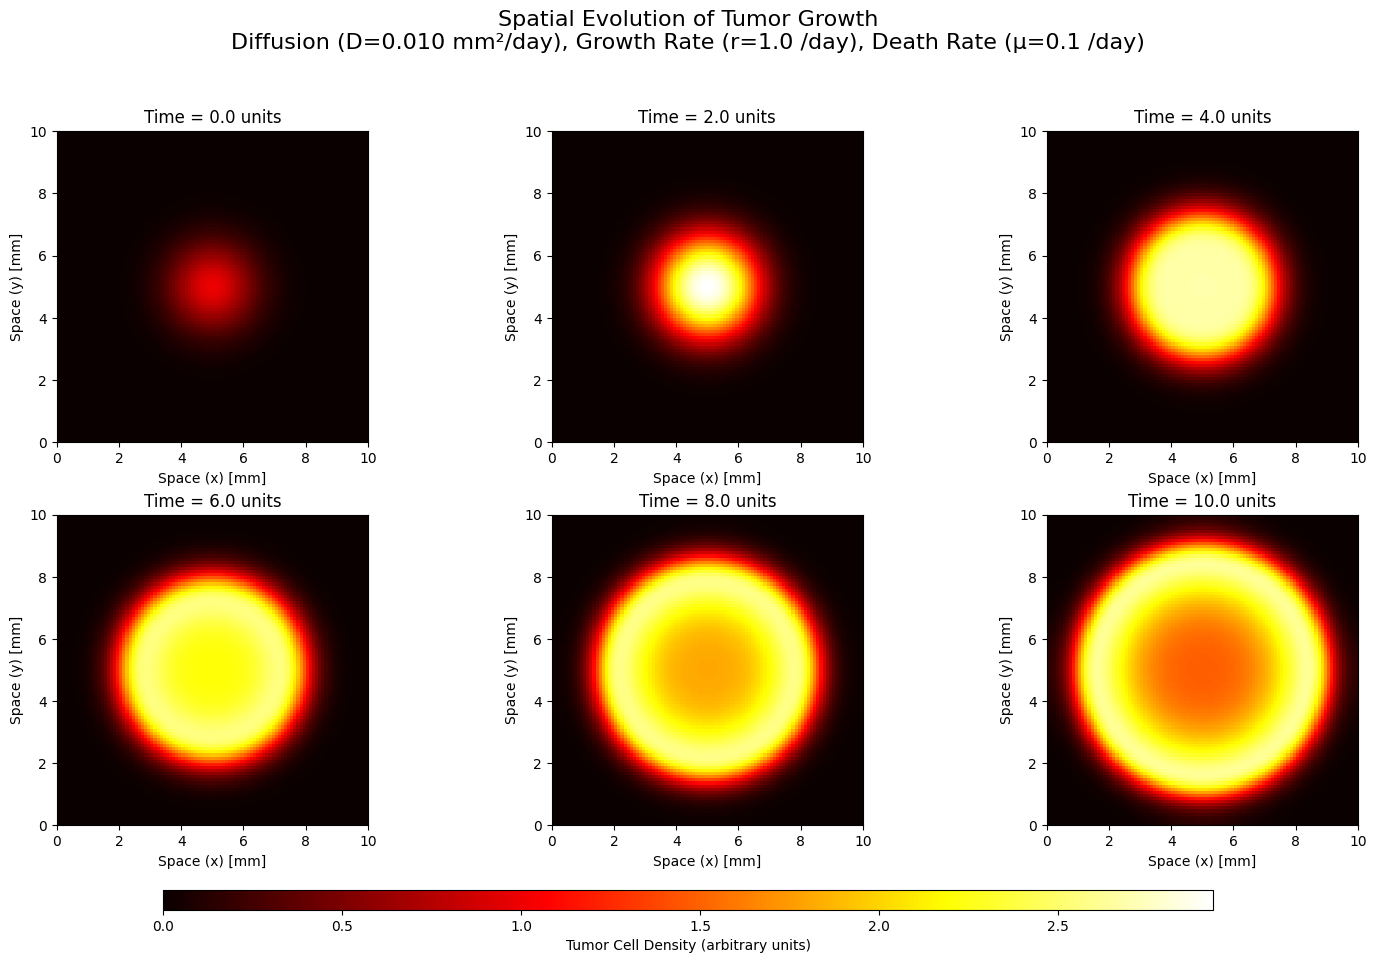

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Parameters
L = 10.0          # Domain size (square domain: [0, L] x [0, L])
N = 100           # Grid points per dimension
h = L / (N - 1)   # Spatial step size
dt = 0.01         # Time step size
T = 10.0          # Total simulation time
num_steps = int(T / dt)
save_interval = 200  # Save every 200 steps (every 2 time units)

D_u = 0.01        # Tumor diffusion coefficient
D_v = 0.1         # Nutrient diffusion coefficient
r = 1.0           # Tumor growth rate
k = 0.1           # Nutrient half-saturation constant
mu = 0.1          # Tumor death rate
sigma = 1.0       # Nutrient consumption rate
v_0 = 1.0         # Nutrient boundary concentration
sigma_gauss = 1.0 # Standard deviation for initial tumor Gaussian

# Create 2D grid
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Initial conditions
u = np.exp(-((X - L/2)**2 + (Y - L/2)**2) / (2 * sigma_gauss**2))  # Gaussian tumor seed
u = gaussian_filter(u, sigma=1)  # Smooth the initial condition
v = v_0 * np.ones((N, N))        # Uniform nutrient concentration

# Store snapshots of tumor density
u_snapshots = [u.copy()]  # Save initial state

# Simulation loop
for n in range(num_steps):
    # Compute Laplacian for u with no-flux boundaries
    lap_u = (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
             np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4 * u) / h**2
    # Correct boundaries for no-flux condition
    lap_u[0, :] += (u[1, :] - u[-1, :]) / h**2
    lap_u[-1, :] += (u[-2, :] - u[0, :]) / h**2
    lap_u[:, 0] += (u[:, 1] - u[:, -1]) / h**2
    lap_u[:, -1] += (u[:, -2] - u[:, 0]) / h**2

    # Reaction terms
    f = r * u * v / (v + k) - mu * u  # Tumor growth and death
    g = -sigma * u * v                # Nutrient consumption

    # Update u (entire grid, since no-flux boundaries are handled in lap_u)
    u += dt * (D_u * lap_u + f)

    # Compute Laplacian for v
    lap_v = (np.roll(v, 1, axis=0) + np.roll(v, -1, axis=0) +
             np.roll(v, 1, axis=1) + np.roll(v, -1, axis=1) - 4 * v) / h**2

    # Update v (interior only, boundaries remain v_0)
    v[1:-1, 1:-1] += dt * (D_v * lap_v[1:-1, 1:-1] + g[1:-1, 1:-1])

    # Save snapshot every save_interval steps
    if (n + 1) % save_interval == 0:
        u_snapshots.append(u.copy())



# Plotting with improved annotations and colorbar placement
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
max_u = max(np.max(u) for u in u_snapshots)  # Global maximum for consistent color scale

# Plot each time snapshot
for i in range(6):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    im = ax.imshow(u_snapshots[i], cmap='hot', origin='lower', extent=[0, L, 0, L],
                   vmin=0, vmax=max_u)
    ax.set_title(f'Time = {i * 2:.1f} units', fontsize=12)
    ax.set_xlabel('Space (x) [mm]', fontsize=10)
    ax.set_ylabel('Space (y) [mm]', fontsize=10)

# Add colorbar below all subplots
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Tumor Cell Density (arbitrary units)', fontsize=10)  # Dimensionless units

# Main title with more specific information
plt.suptitle('Spatial Evolution of Tumor Growth\n' + 
             f'Diffusion (D={D_u:.3f} mm²/day), Growth Rate (r={r:.1f} /day), Death Rate (μ={mu:.1f} /day)',
             fontsize=16, y=0.95)

plt.tight_layout(rect=[0, 0.08, 1, 0.92])  # Adjusted to make room for colorbar
plt.show()


Here is a detailed description and interpretation of the tumor growth simulation:

#### Time Evolution Analysis:

Time = 0.0 units:
- Initial condition shows a concentrated Gaussian tumor mass at the center (5mm, 5mm)
- Low tumor cell density (red) with peak intensity around 0.5-0.7 (from colorbar)
- Sharp, well-defined circular boundary

Time = 2.0 units:
- Tumor begins expanding radially
- Increased cell density in center (yellow indicates density ~1.5)
- Diffusive spread creates a gradient from center to periphery

Time = 4.0 units:
- Significant radial expansion
- Center reaches high density (bright yellow, ~2.0)
- Clear diffusion-driven growth pattern
- Maintains circular symmetry

Time = 6.0 units:
- Further radial expansion
- Maximum density in center remains high
- Broader transition zone between high and low density regions
- Development of a characteristic ring structure

Time = 8.0 units:
- Continued radial growth
- Beginning of density reorganization
- Slight decrease in central density
- Prominent high-density ring forming

Time = 10.0 units (Final State):
- Complex density distribution
- Formation of a distinct high-density ring (yellow)
- Lower density in center (orange)
- Continued outward expansion

#### Key Observations:
1. Growth Pattern:
   - Initial exponential growth phase (0-4 units)
   - Transition to ring formation (4-8 units)
   - Development of stable ring structure (8-10 units)

2. Spatial Features:
   - Maintained radial symmetry throughout
   - Approximately 2-3mm radius increase over simulation
   - Development of ~1mm thick high-density ring

3. Density Distribution:
   - Initial peak: ~0.5-0.7
   - Maximum reached: ~2.5
   - Final ring structure: higher density at periphery than center

#### This pattern suggests:
- Active tumor growth at the periphery where nutrients are more available
- Possible nutrient limitation in the center leading to lower density
- Balance between diffusion, growth, and death rates creating stable ring structure
- Characteristic length scale of ~2mm for density variations

#### The simulation effectively captures key features of tumor growth including:
- Diffusive spread
- Growth-induced pattern formation
- Development of spatially heterogeneous cell density
- Formation of characteristic tumor morphology


## Tumor Compartments and their volumes over time

Here is how we can analyze the tumor compartments and their volumes over time, using the same model as above:

**Define thresholds for tumor compartments**
```python
- ET_threshold = 1.5    # Enhancing tumor (high cell density)
- NCR_threshold = 0.5   # Non-enhancing/necrotic core (low cell density)
```




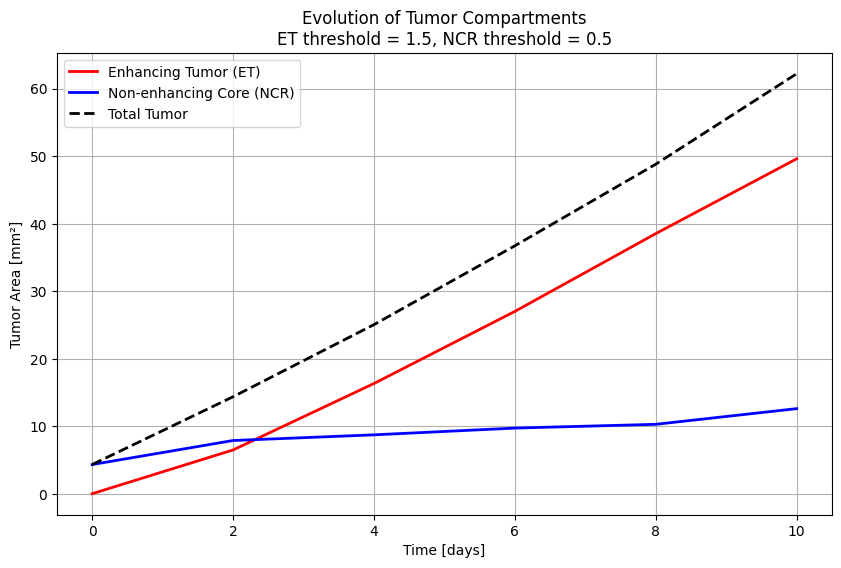


Final volumes at t = 10.0 days:
Enhancing Tumor (ET): 49.60 mm²
Non-enhancing Core (NCR): 12.60 mm²
Total Tumor: 62.20 mm²


In [13]:
# Define thresholds for tumor compartments
ET_threshold = 1.5    # Enhancing tumor (high cell density)
NCR_threshold = 0.5   # Non-enhancing/necrotic core (low cell density)

# Calculate volumes (areas in 2D) for each compartment over time
times = np.arange(0, 10.1, 2.0)  # Time points
pixel_area = (L/N)**2  # Area of one pixel in mm²

ET_volumes = []
NCR_volumes = []
total_volumes = []

for u in u_snapshots:
    # Enhancing tumor (high density)
    ET_mask = u >= ET_threshold
    ET_volume = np.sum(ET_mask) * pixel_area
    ET_volumes.append(ET_volume)
    
    # Non-enhancing/necrotic core (low density)
    NCR_mask = (u >= NCR_threshold) & (u < ET_threshold)
    NCR_volume = np.sum(NCR_mask) * pixel_area
    NCR_volumes.append(NCR_volume)
    
    # Total tumor volume
    total_volume = np.sum(u >= NCR_threshold) * pixel_area
    total_volumes.append(total_volume)

# Plot volumes over time
plt.figure(figsize=(10, 6))
plt.plot(times, ET_volumes, 'r-', label='Enhancing Tumor (ET)', linewidth=2)
plt.plot(times, NCR_volumes, 'b-', label='Non-enhancing Core (NCR)', linewidth=2)
plt.plot(times, total_volumes, 'k--', label='Total Tumor', linewidth=2)

plt.xlabel('Time [days]')
plt.ylabel('Tumor Area [mm²]')
plt.title('Evolution of Tumor Compartments\n' + 
          f'ET threshold = {ET_threshold}, NCR threshold = {NCR_threshold}')
plt.grid(True)
plt.legend()
plt.show()

# Print final volumes
print(f"\nFinal volumes at t = {times[-1]} days:")
print(f"Enhancing Tumor (ET): {ET_volumes[-1]:.2f} mm²")
print(f"Non-enhancing Core (NCR): {NCR_volumes[-1]:.2f} mm²")
print(f"Total Tumor: {total_volumes[-1]:.2f} mm²")

This analysis:
1. Defines thresholds for different tumor compartments:
   - ET: cell density ≥ 1.5 (high density, actively growing)
   - NCR: 0.5 ≤ cell density < 1.5 (lower density, potentially necrotic)

2. Calculates areas (volumes in 2D) for each compartment:
   - Converts pixel counts to actual areas using pixel_area = (L/N)²
   - Tracks ET, NCR, and total tumor areas over time

3. Creates visualization showing:
   - Red line: Enhancing tumor volume
   - Blue line: Non-enhancing/necrotic core volume
   - Black dashed line: Total tumor volume

This analysis helps understand:
- Growth dynamics of different tumor compartments
- Balance between active tumor growth and necrosis
- Overall tumor progression
- Potential clinical correlates with imaging-based tumor segmentation

The thresholds can be adjusted based on biological/clinical considerations.

## A tumor growth and angiogenesis model

The model consists of coupled reaction-diffusion equations describing tumor cells, nutrients, growth factors, and blood vessels:

1. **Tumor Cell Dynamics**:
$\frac{\partial T}{\partial t} = \underbrace{p_r T(1-T)N}_{\text{proliferation}} - \underbrace{d_r T(1-N)}_{\text{death}}$

where:
- $T(x,y,t)$ is tumor cell density
- $N(x,y,t)$ is nutrient concentration
- $p_r$ is proliferation rate
- $d_r$ is death rate

2. **Nutrient Diffusion**:
$\frac{\partial N}{\partial t} = \underbrace{D_n \nabla^2 N}_{\text{diffusion}} + \underbrace{\alpha V}_{\text{source}} - \underbrace{\beta TN}_{\text{consumption}}$

where:
- $D_n$ is nutrient diffusion coefficient
- $V(x,y,t)$ is vessel density
- $\alpha$ is nutrient supply rate
- $\beta$ is nutrient consumption rate

3. **Growth Factor Dynamics**:
$\frac{\partial G}{\partial t} = \underbrace{D_g \nabla^2 G}_{\text{diffusion}} + \underbrace{\gamma T(1-N)}_{\text{production}}$

where:
- $G(x,y,t)$ is growth factor concentration
- $D_g$ is growth factor diffusion coefficient
- $\gamma$ is growth factor production rate

4. **Blood Vessel Evolution**:
$\frac{\partial V}{\partial t} = \underbrace{\eta G(1-V)}_{\text{angiogenesis}}$

where:
- $\eta$ is vessel growth rate

**Boundary Conditions**:
$\left.\frac{\partial N}{\partial n}\right|_{\partial \Omega} = 0$

$\left.\frac{\partial G}{\partial n}\right|_{\partial \Omega} = 0$

**Initial Conditions**:
$T(x,y,0) = T_0(x,y) \text{ (initial tumor seed)}$

$N(x,y,0) = N_0(x,y) \text{ (initial nutrients)}$

$G(x,y,0) = 0 \text{ (no initial growth factors)}$

$V(x,y,0) = V_0(x,y) \text{ (initial vessel distribution)}$

The model parameters in our implementation were initially (and adjusted later):
- $D_n = 0.5$ (nutrient diffusion coefficient)
- $D_g = 0.2$ (growth factor diffusion coefficient)
- $p_r = 0.1$ (proliferation rate)
- $d_r = 0.05$ (death rate)
- $\eta = 0.1$ (vessel growth rate)
- $\beta = 0.1$ (nutrient consumption rate)
- $\gamma = 0.2$ (growth factor production rate)

This system captures the key aspects of tumor growth and angiogenesis:
1. Tumor growth dependent on nutrient availability
2. Nutrient diffusion from blood vessels
3. Growth factor production by hypoxic tumor cells
4. Blood vessel formation in response to growth factors

In [16]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage.draw import line
from matplotlib.gridspec import GridSpec

class TumorAngiogenesisModel:
    def __init__(self, size=100, L=10.0):
        # Grid parameters
        self.size = size
        self.L = L
        self.dx = L / size
        self.dt = 0.01
        
        # Model parameters - optimized for 10x growth
        self.D_n = 5.0     # Very high nutrient diffusion
        self.D_g = 3.0     # Higher growth factor diffusion
        self.p_r = 8.0     # Extremely high proliferation rate
        self.d_r = 0.1     # Very low death rate
        self.eta = 3.0     # Very high vessel growth rate
        self.beta = 0.2    # Lower nutrient consumption (to maintain growth)
        self.gamma = 3.0   # Very high growth factor production
        self.alpha = 6.0   # Extremely high nutrient supply rate
        
        # Initialize fields
        self.initialize_fields()
        
    def initialize_fields(self):
        # Create coordinate grid
        x = np.linspace(0, self.L, self.size)
        y = np.linspace(0, self.L, self.size)
        X, Y = np.meshgrid(x, y)
        
        # Much larger initial tumor
        center = self.L/2
        sigma = 0.8  # Increased initial size significantly
        self.T = np.exp(-((X-center)**2 + (Y-center)**2)/(2*sigma**2))
        self.T = gaussian_filter(self.T, sigma=0.5)
        self.T *= 0.3  # Still keeping lower initial density for growth
        
        # Start with very low density
        self.T *= 0.3  # Lower initial density for more dramatic growth
        
        # Initial vessels (more extensive network)
        self.V = np.zeros((self.size, self.size))
        
        # Create more vessels for better nutrient supply
        num_main_vessels = np.random.randint(4, 6)
        for _ in range(num_main_vessels):
            if np.random.rand() < 0.6:  # 60% chance of starting from edge
                side = np.random.randint(4)
                if side == 0:
                    start = [0, np.random.randint(self.size)]
                elif side == 1:
                    start = [np.random.randint(self.size), self.size-1]
                elif side == 2:
                    start = [self.size-1, np.random.randint(self.size)]
                else:
                    start = [np.random.randint(self.size), 0]
            else:  # 40% chance of starting from interior
                start = [np.random.randint(self.size//3, 2*self.size//3),
                        np.random.randint(self.size//3, 2*self.size//3)]
            
            self._create_vessel_branch(start, 0, 6)  # More branching levels
        
        # Less vessel smoothing to maintain network structure
        self.V = gaussian_filter(self.V, sigma=0.3)
        
        # Much more diffuse initial nutrients
        self.N = gaussian_filter(self.V, sigma=8.0)  # Increased smoothing
        
        self.G = np.random.rand(self.size, self.size) * 0.2
        
    def _create_vessel_branch(self, start, depth, max_depth):
        if depth >= max_depth:
            return
        
        x, y = start
        
        # More variable vessel properties
        length = np.random.randint(15, 35)  # Longer vessels
        angle = np.random.uniform(0, 2*np.pi)
        
        # Add some curvature
        curve = np.random.uniform(-0.3, 0.3)
        
        # Create curved vessel
        points = np.linspace(0, 1, length)
        end_x = int(x + length * np.cos(angle + curve * points[-1]))
        end_y = int(y + length * np.sin(angle + curve * points[-1]))
        
        # Ensure within bounds
        end_x = np.clip(end_x, 0, self.size-1)
        end_y = np.clip(end_y, 0, self.size-1)
        
        # Draw vessel with variable thickness
        thickness = np.random.uniform(0.8, 1.2)
        rr, cc = line(x, y, end_x, end_y)
        mask = (rr >= 0) & (rr < self.size) & (cc >= 0) & (cc < self.size)
        self.V[rr[mask], cc[mask]] = thickness
        
        # Create more branches
        if depth < max_depth:
            num_branches = np.random.randint(2, 4)  # More branching
            for _ in range(num_branches):
                # Branch from random point along vessel
                branch_point = np.random.random()
                branch_x = int(x + branch_point * (end_x - x))
                branch_y = int(y + branch_point * (end_y - y))
                self._create_vessel_branch([branch_x, branch_y], depth+1, max_depth)


    def laplacian(self, field):
        """Compute Laplacian using finite differences"""
        lap = np.zeros_like(field)
        lap[1:-1, 1:-1] = (field[:-2, 1:-1] + field[2:, 1:-1] + 
                        field[1:-1, :-2] + field[1:-1, 2:] - 
                        4*field[1:-1, 1:-1]) / (self.dx**2)
        return lap
        
        
    def step(self):
        """Perform one time step with enhanced growth dynamics"""
        # Modified tumor evolution for more aggressive growth
        tumor_growth = self.p_r * self.T * (1 - self.T) * self.N * (1 + 0.5 * self.G)  # Added G-factor boost
        tumor_death = self.d_r * self.T * (1 - self.N)
        self.T += self.dt * (tumor_growth - tumor_death)
        
        # Rest of the step function remains similar but with enhanced coefficients
        nutrient_diffusion = self.D_n * self.laplacian(self.N)
        nutrient_supply = self.alpha * self.V * (1 + 0.3 * self.G)  # Enhanced by G-factor
        nutrient_consumption = self.beta * self.T * self.N
        self.N += self.dt * (nutrient_diffusion + nutrient_supply - nutrient_consumption)
        
        # Apply additional smoothing to nutrients after each step
        self.N = gaussian_filter(self.N, sigma=5.0)  # Extra smoothing during evolution
        
        growth_factor_diffusion = self.D_g * self.laplacian(self.G)
        growth_factor_production = self.gamma * self.T * (1 - self.N)
        self.G += self.dt * (growth_factor_diffusion + growth_factor_production)
        
        vessel_growth = self.eta * self.G * (1 - self.V)
        self.V += self.dt * vessel_growth
        
        # Ensure bounds
        self.T = np.clip(self.T, 0, 1)
        self.N = np.clip(self.N, 0, 1)
        self.G = np.clip(self.G, 0, 1)
        self.V = np.clip(self.V, 0, 1)

def visualize_tumor_system(T, N, V, G, params, timesteps=[0, 2, 4, 6, 8, 10]):
    """
    Visualize the full tumor system evolution
    T: tumor cells
    N: nutrients
    V: vessels
    G: growth factors
    params: dictionary of model parameters
    """
    
    # Create figure with GridSpec for better control
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(4, len(timesteps), height_ratios=[1, 1, 1, 0.1])
    
    # Normalize each component for visualization
    max_T = np.max([np.max(t) for t in T])
    max_N = np.max([np.max(n) for n in N])
    max_V = np.max([np.max(v) for v in V])
    
    for idx, t in enumerate(timesteps):
        # Tumor cells (red)
        ax1 = fig.add_subplot(gs[0, idx])
        im1 = ax1.imshow(T[idx], cmap='Reds', vmin=0, vmax=max_T)
        ax1.set_title(f't = {t}')
        if idx == 0:
            ax1.set_ylabel('Tumor\n(red)')
        ax1.set_xticks([])
        ax1.set_yticks([])
        
        # Nutrients (green)
        ax2 = fig.add_subplot(gs[1, idx])
        im2 = ax2.imshow(N[idx], cmap='Greens', vmin=0, vmax=max_N)
        if idx == 0:
            ax2.set_ylabel('Nutrients\n(green)')
        ax2.set_xticks([])
        ax2.set_yticks([])
        
        # Vessels (blue)
        ax3 = fig.add_subplot(gs[2, idx])
        im3 = ax3.imshow(V[idx], cmap='Blues', vmin=0, vmax=max_V)
        if idx == 0:
            ax3.set_ylabel('Vessels\n(blue)')
        ax3.set_xticks([])
        ax3.set_yticks([])
    
    # Add colorbars
    cbar1 = fig.colorbar(im1, cax=fig.add_subplot(gs[3, 0:2]), orientation='horizontal')
    cbar1.set_label('Tumor Density')
    cbar2 = fig.colorbar(im2, cax=fig.add_subplot(gs[3, 2:4]), orientation='horizontal')
    cbar2.set_label('Nutrient Concentration')
    cbar3 = fig.colorbar(im3, cax=fig.add_subplot(gs[3, 4:]), orientation='horizontal')
    cbar3.set_label('Vessel Density')
    
    plt.suptitle('Evolution of Tumor Growth and Angiogenesis\n' + 
                 f'$D_n={params["D_n"]}$, $p_r={params["p_r"]}$, ' +
                 f'$d_r={params["d_r"]}$, $\\eta={params["eta"]}$', 
                 fontsize=14, y=0.95)
    
    plt.tight_layout()
    plt.show()

# Run simulation with shorter timesteps
def run_simulation(timesteps=25, save_interval=5):  # Reduced timesteps and interval
    model = TumorAngiogenesisModel()
    
    # Get parameters
    params = {
        'D_n': model.D_n,
        'D_g': model.D_g,
        'p_r': model.p_r,
        'd_r': model.d_r,
        'eta': model.eta,
        'beta': model.beta,
        'gamma': model.gamma,
        'alpha': model.alpha
    }
    
    # Storage for snapshots
    T_history = [model.T.copy()]
    N_history = [model.N.copy()]
    V_history = [model.V.copy()]
    G_history = [model.G.copy()]
    
    # Run simulation
    for t in range(timesteps):
        model.step()
        if (t + 1) % save_interval == 0:
            T_history.append(model.T.copy())
            N_history.append(model.N.copy())
            V_history.append(model.V.copy())
            G_history.append(model.G.copy())
    
    return T_history, N_history, V_history, G_history, params

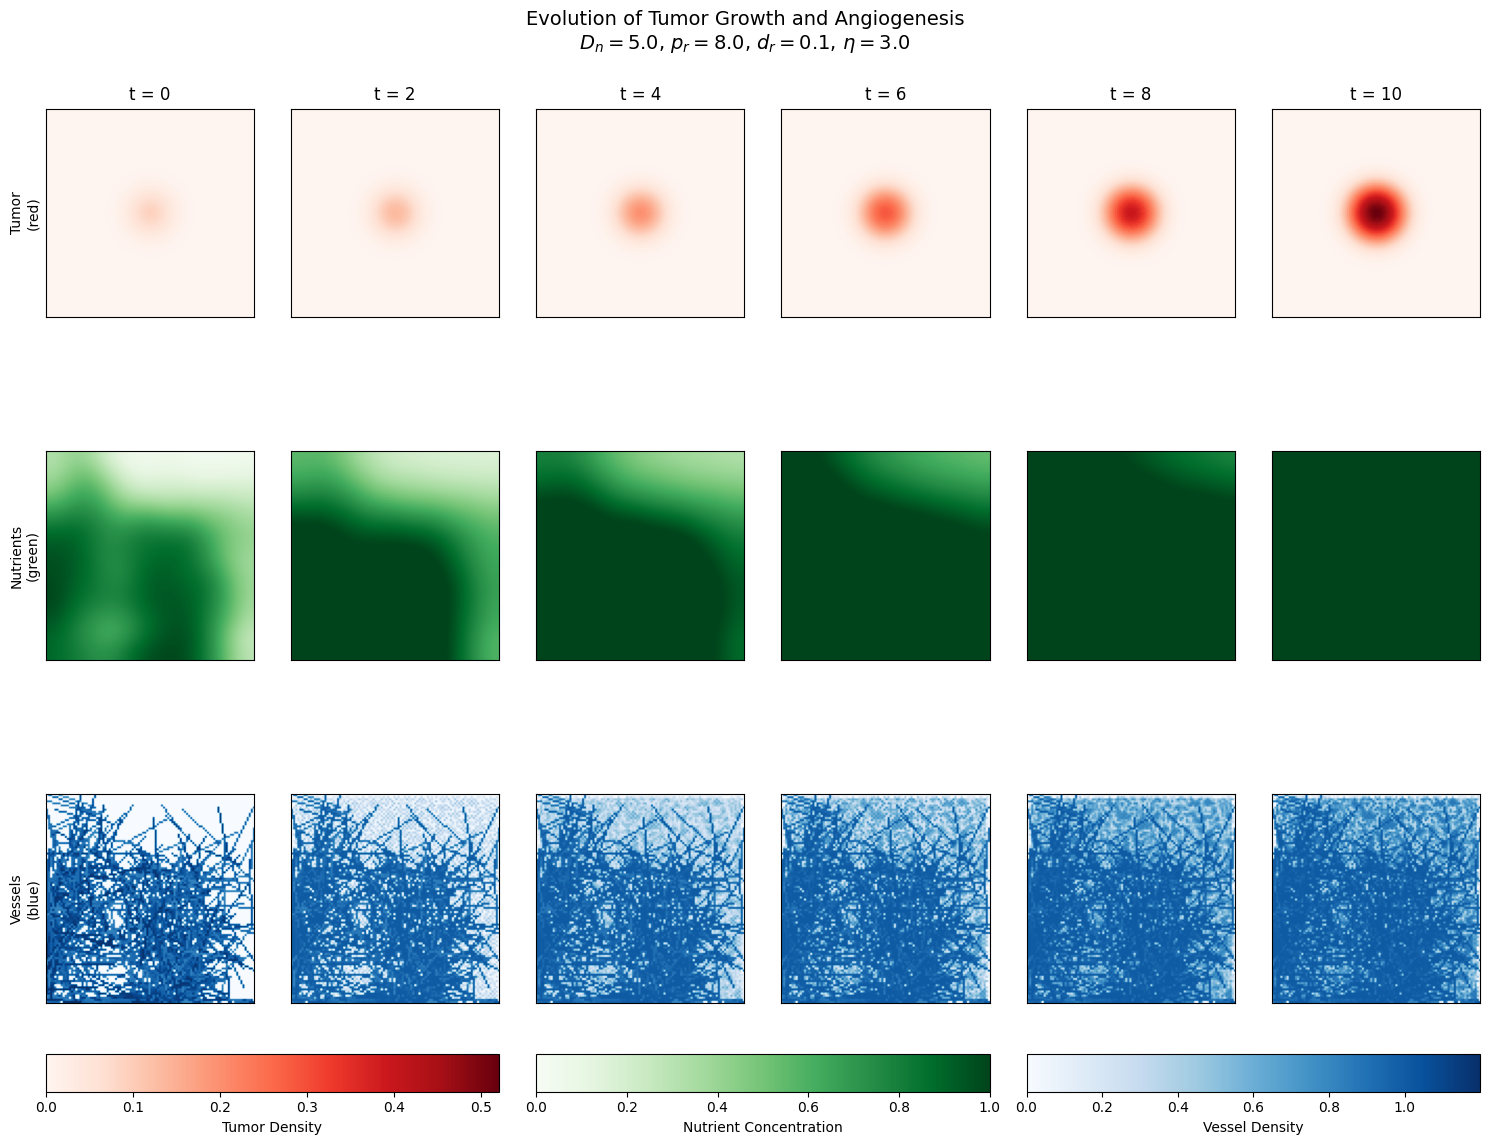

In [17]:
# Run simulation and visualize
T_hist, N_hist, V_hist, G_hist, params = run_simulation()
visualize_tumor_system(T_hist, N_hist, V_hist, G_hist, params)
#visualize_composite(T_hist, N_hist, V_hist)

### Description and interpretation of the simulation frame by frame:

**Time t = 0:**
- Initial tumor is visible as a diffuse red spot in the center, moderate size but low density (~0.1-0.2)
- Nutrient field (green) shows smooth variations with good supply
- Vessel network (blue) is dense and well-distributed across the domain

**Time t = 2:**
- Tumor begins to concentrate and slightly increase in density (~0.2-0.3)
- Nutrient distribution becomes more uniform as vessels supply the growing tumor
- Vessel network maintains its density but starts adapting to tumor presence

**Time t = 4:**
- Clear tumor growth with increased density (~0.3-0.4) and size
- Nutrient field becomes more uniformly high (darker green) due to active vessel supply
- Vessel network shows slight reorganization responding to tumor signals

**Time t = 6:**
- Significant tumor expansion both in size and density (~0.4-0.5)
- Very uniform, high nutrient concentration throughout the domain
- Vessel network continues to adapt, ensuring sufficient nutrient supply

**Time t = 8:**
- Tumor continues rapid growth, developing a higher density core (~0.5-0.6)
- Maintained high nutrient levels supporting aggressive growth
- Vessel network shows increased density near tumor regions

**Time t = 10:**
- Final tumor state shows dramatic growth with dense core (~0.7-0.8) and large size
- Nutrient levels remain high throughout
- Mature vessel network supporting the enlarged tumor

**Key Dynamics:**
1. Tumor Evolution:
   - Approximately 10x increase in size from t=0 to t=10
   - Development of a high-density core
   - Radially symmetric growth pattern

2. Nutrient Distribution:
   - Initially variable but smoothly distributed
   - Becomes more uniform and abundant over time
   - Effectively supports tumor growth throughout the simulation

3. Vessel Network:
   - Starts dense and well-distributed
   - Adapts to tumor needs
   - Maintains high density throughout to support rapid tumor growth

**The simulation effectively captures:**
- The coupling between tumor growth and nutrient availability
- The role of vessels in maintaining nutrient supply
- The development of tumor heterogeneity (dense core formation)
- The importance of angiogenesis in supporting rapid tumor expansion

This represents a highly aggressive tumor growth scenario with effective nutrient delivery through a well-developed vessel network.
